In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
players = pd.read_csv('player_data.csv')
seasons = pd.read_csv('Seasons_stats.csv')
p = players.groupby('college').count()
playerByCollege = p.sort_values(by = 'name', ascending=False)
top20 = playerByCollege['name'].head(20)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

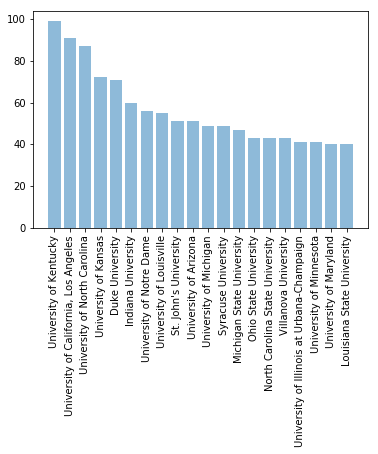

In [46]:
y_pos = np.arange(20)
plt.xticks(y_pos, top20.index)
plt.bar(y_pos, top20, align='center', alpha=0.5)
plt.xticks(rotation=90)

Text(0.5,1,'Average Player Weight by the Year They were Drafted')

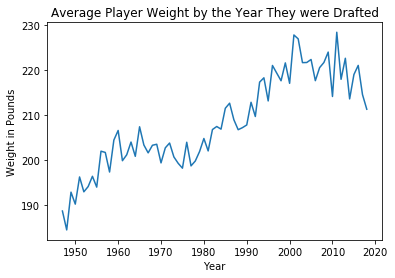

In [17]:
p = players.groupby('year_start').mean()
weightByYear = p['weight']
plt.plot(weightByYear.index, weightByYear)
plt.xlabel('Year')
plt.ylabel('Weight in Pounds')
plt.title('Average Player Weight by the Year They were Drafted')

Text(0,0.5,'Shots')

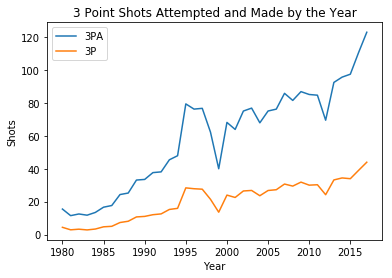

In [66]:
s =seasons.groupby('Year').mean()
threeA = s['3PA']
threeM = s['3P']
efg = s['eFG%']

plt.plot(threeA.index, threeA)
plt.plot(threeM.index, threeM)

plt.legend()

plt.title('3 Point Shots Attempted and Made by the Year')
plt.xlabel('Year')
plt.ylabel('Shots')

In [65]:
seasons.columns

Index(['Unnamed: 0', 'Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP',
       'PER', 'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%',
       'BLK%', 'TOV%', 'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2',
       'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%',
       '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB',
       'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [68]:
s = seasons.loc[seasons['MP'] >= 500,:]
s = s.loc[seasons['Year'] >= 1980,:]
s = s.groupby(by =['Player','Year']).mean()
s = s[['PER', '3P', 'MP','eFG%']]
playersByPER = s.sort_values(by = 'eFG%', ascending=False)
playersByPER.head(15)

PER     3P      MP   eFG%
Player            Year                              
Chris Wilcox      2013.0  15.3    0.0   830.0  0.719
DeAndre Jordan    2017.0  21.8    0.0  2570.0  0.714
                  2015.0  21.0    1.0  2820.0  0.711
                  2016.0  20.6    0.0  2598.0  0.703
                  2011.0  14.8    0.0  2047.0  0.686
Carlos Rogers     2001.0  18.1    0.0   544.0  0.682
Tyson Chandler    2012.0  18.7    0.0  2061.0  0.679
Brandan Wright    2014.0  23.5    0.0  1077.0  0.677
DeAndre Jordan    2014.0  18.2    0.0  2870.0  0.676
Steve Novak       2012.0  15.9  133.0  1020.0  0.675
Tyson Chandler    2017.0  16.6    0.0  1298.0  0.671
Kyle Korver       2015.0  14.8  221.0  2418.0  0.671
Lucas Nogueira    2017.0  15.5    3.0  1088.0  0.670
Artis Gilmore*    1981.0  21.7    0.0  2832.0  0.670
Shaquille O'Neal* 2011.0  17.4    0.0   752.0  0.667